In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('london_weather.csv')
df
import pandas as pd


timestamp = pd.Timestamp('2021-01-01 12:00:00')

# Convert Timestamp to timestamp (in integer form)
timestamp_to_int = timestamp.timestamp()

# Converts a timestamp to float
timestamp_to_float = float(timestamp_to_int)

print(timestamp_to_float)

1609502400.0


In [3]:
###Random forest using

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
date_column = df['date']
data_column_filled = date_column.fillna(0)  # Fixed variable names and indentation

mean_temp_column = df['mean_temp']
mean_temp_column_filled = mean_temp_column.fillna(0)  # Fixed indentation
print(data_column_filled)
print(mean_temp_column_filled)

Mean Squared Error: 18.806223939600535


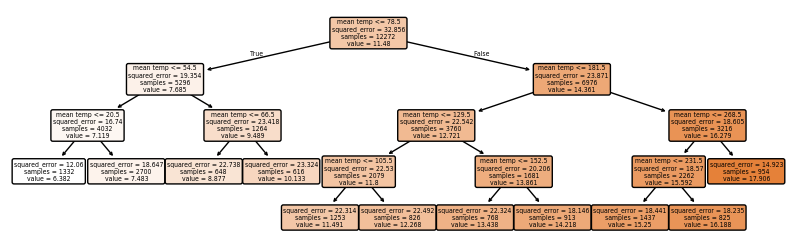

In [128]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

df = pd.read_csv('london_weather.csv')

# Check and process missing values
# Fill the empty value with the previous value
df.fillna(method='ffill', inplace=True)

X = df[['global_radiation']]  # Feature column
y = df['mean_temp']  # target column

# check again
if y.isnull().any():
    raise ValueError("After processing the missing value, there is still a NaN value in the target variable y")

# Divide the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a decision tree model
tree_reg = DecisionTreeRegressor(random_state=42,ccp_alpha=0.015)

# training model
tree_reg.fit(X_train, y_train)

# predict training result
y_pred = tree_reg.predict(X_test)

# Evaluation model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
plt.figure(figsize=(10,3))  
plot_tree(tree_reg, filled=True, feature_names=['mean temp'], rounded=True,
         max_depth=None,)  
from sklearn.tree import DecisionTreeClassifier

plt.show()

In [ ]:
from sklearn.svm import SVC

In [131]:
from sklearn.model_selection import train_test_split
X = df[['global_radiation']]
y = df['mean_temp'] 

In [ ]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
standard.fit_transform(X)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# try with linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assume that X_train, y_train, X_test have been defined and loaded

model = LinearRegression()
model.fit(X_train, y_train)

y_pre = model.predict(X_test)

# print shape
print(y_pre.shape)

# draw scatter plot
plt.scatter(y_pre, y_test)  

plt.show()  

In [ ]:
##compare decision tree and linear regression
model=LinearRegression()
model.fit(X_train,y_train)
print('score of training data：',model.score(X_train,y_train))
print('score of test data：',model.score(X_test,y_test))

0.5583266007684349

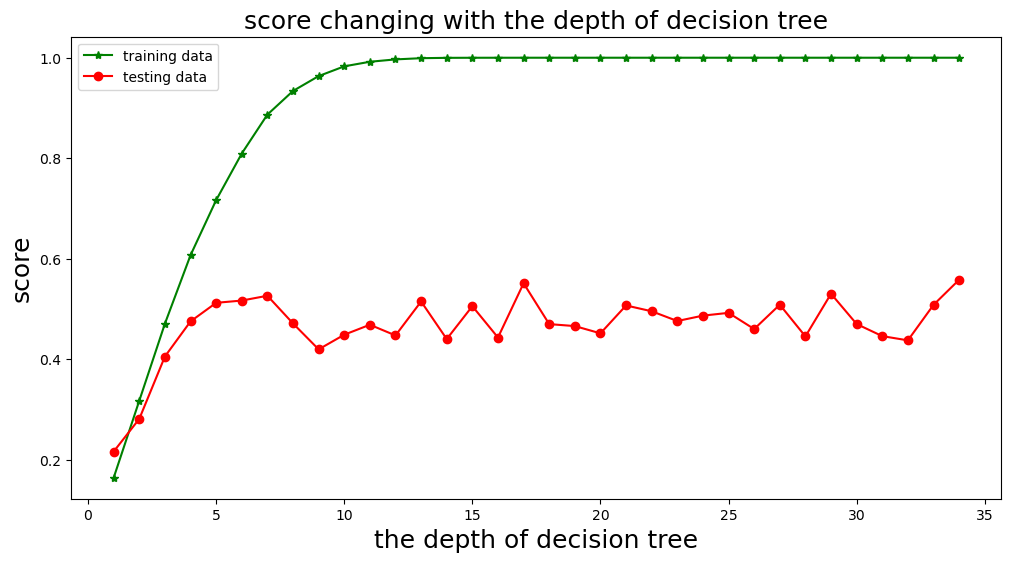

In [121]:
import matplotlib.pyplot as plt
max_depth=np.arange(1,35)
score=[]
score2=[]
plt.figure(figsize=(12,6))
for d in max_depth:
    model=DecisionTreeRegressor(max_depth=d)
    model.fit(X_train,y_train)
    score2.append(model.score(X_train,y_train)) #The score of the decision tree on the training data

    s=model.score(X_test,y_test)
    
    score.append(s)
plt.plot(max_depth,score2,'g*-')   #The green is the training data  
plt.plot(max_depth,score,'ro-')    #The red is the test data
plt.xlabel('the depth of decision tree',fontsize=18)
plt.ylabel('score',fontsize=18)
plt.legend(['training data','testing data'])
plt.title('score changing with the depth of decision tree',fontsize=18)

max(score)

In [ ]:
### random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [49]:
# Use random forest regressors
rf = RandomForestRegressor(n_estimators=100)  # 100 trees
rf.fit(X_train, y_train)

# Evaluate model
score = rf.score(X_test, y_test)
score2=rf.score(X_train, y_train)
print("R² test score is:", score)
print("R² training score is:", score2)

R² test score is: 0.40902684936555833
R² training score is: 0.4401653922862486


In [101]:
print(f"Number of trees in the random forest: {len(rf_regressor.estimators_)}")

Number of trees in the random forest: 5


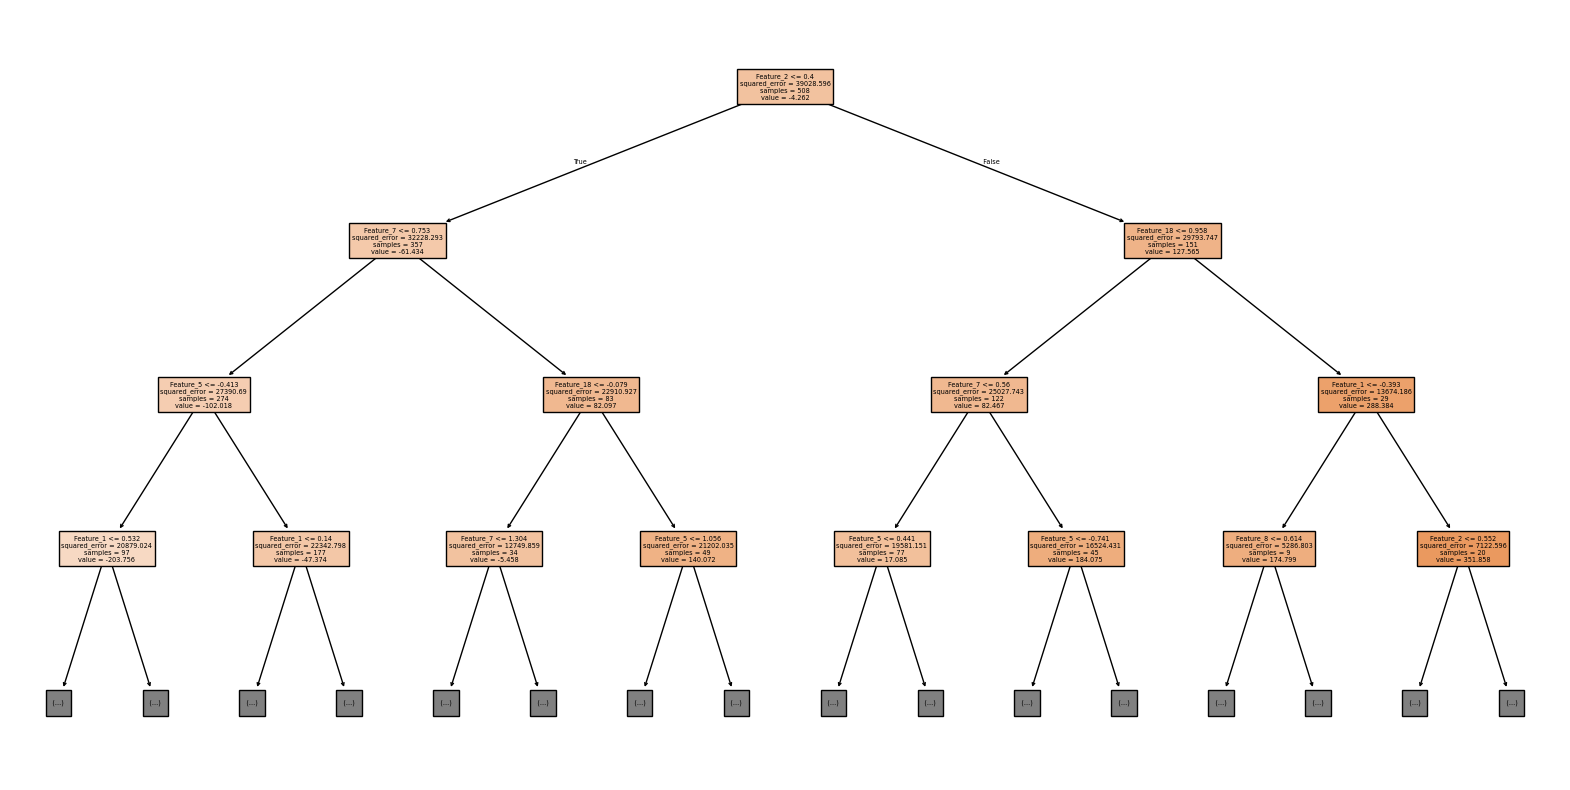

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

rf_regressor = RandomForestRegressor(n_estimators=5)
rf_regressor.fit(X_train, y_train)

# Ensure that the number of feature names matches the number of features in the data set
n_features = X_train.shape[1]
feature_names = [f"Feature_{i+1}" for i in range(n_features)]

# Check the number of trees in the random forest and select a valid index
n_trees = len(rf_regressor.estimators_)
tree_index = 0  # Select the first tree and make sure the index is in a valid range

# visual
plt.figure(figsize=(20, 10))  
plot_tree(rf_regressor.estimators_[tree_index], filled=True, feature_names=feature_names, max_depth=3)
plt.show()

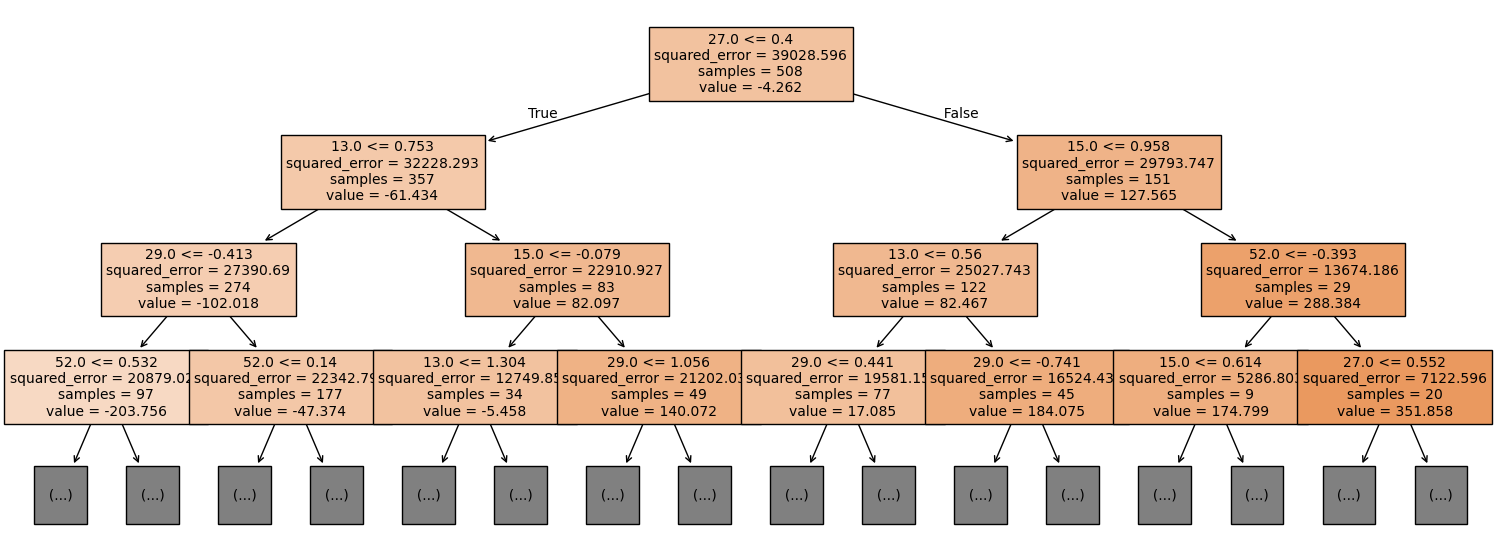

In [110]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Select individual trees in a random forest for visualization
tree = rf_regressor.estimators_[0]

# Sets the size of the graph
plt.figure(figsize=(19, 7))

# limit the max depth of tree
plot_tree(tree, filled=True, feature_names=df['global_radiation'], max_depth=3, fontsize=10)

# x_lebal
plt.xticks(rotation=45)

# show plot
plt.show()

In [80]:
X

array([[ 0.22584183,  1.55137772, -0.10734682, ..., -1.35154745,
         0.3646018 ,  0.13316649],
       [ 0.11083638, -1.45461475,  0.26388849, ..., -1.42646391,
        -0.60451386, -0.16624207],
       [ 0.45860045, -0.08127955, -0.69847376, ...,  0.90822252,
         0.51141526, -2.09317802],
       ...,
       [-0.5125888 ,  1.12477672,  0.89835957, ...,  0.6832124 ,
         1.09848488,  1.27442843],
       [-2.96836843, -0.92984795,  0.05520801, ...,  1.34954631,
        -0.489467  ,  1.23228383],
       [-0.48716718,  2.80137299, -1.08863484, ..., -2.21760908,
         0.50011283,  0.83533344]])

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Definition model
rf_regressor = RandomForestRegressor(random_state=42)

# Perform cross-validation
# cv=5 indicates a 5-fold cross verification
# scoring='neg_mean_squared_error' means using negative mean square error as scoring criterion
scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the cross-validation score
print("Mean square error mean is:", -scores.mean())
print("Mean square error standard deviation is:", scores.std())

# try KFold
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf_regressor.fit(X_train, y_train)
    predictions = rf_regressor.predict(X_test)
    # evaluate model
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

Mean square error mean is: 204.48871158778488
Mean square error standard deviation is: 45.51466752108795
MSE: 174.3621602940741
MSE: 249.57168226805018
MSE: 197.8659266231244
MSE: 205.96566706437946
MSE: 179.25536715906946


In [ ]:
###GBDT Gradient lifting regression tree

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression


# Initialize the gradient lifting regression tree model
gbdt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# training model
gbdt.fit(X_train, y_train)
y_pre=gbdt.predict(X_test)

# predict
y_pre

array([-144.80955778,  -90.07433702,   18.87679738,   23.13067329,
         51.46156171,   22.33461702, -113.00201086,   79.50883582,
        -51.92410043,  -72.27297595,   65.37969929,   57.46290003,
        -17.42075759,  -51.93523094,  -38.97216463,   -3.60520556,
        -14.59337858, -113.60838221,  -42.25056252,  -23.92946723,
         59.41393319,  -37.87774194,  121.17902238,   60.32126396,
         37.7748752 ,   38.93190307,    4.86541127,    8.22683683,
        -78.50953366,  -57.22517285,  -38.66390125,   48.11251096,
        -49.58165366,   79.78763251,    3.70583718,  -23.26369581,
         78.9013507 ,  -55.96564206,  -25.47486259,  -67.2683919 ,
       -138.06151275,  -59.35532176,   54.68992954,   22.9752247 ,
         46.10769026,   21.5374832 ,   39.41119896,    1.90003765,
        -67.08497788,  -34.23290071,  -35.49364579,  -85.70672317,
        -22.74712696,   54.65313645,   94.11519493,   76.61759153,
         -0.74022155,   39.85858283,  -44.62102715,  -34.51288

In [ ]:
### Partial data filtering

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
# data filtering with ElasticNet first
model=ElasticNet(alpha =0.1,l1_ratio=0.05)
model.fit(X_train,y_train)
# Filter conditions, delete coefficients equal to 0
cond=model.coef_!=0
X_train=X_train[:,cond]
X_test=X_test[:,cond]
print('the shape after delete values is:',X_train.shape)

#GBDT Model training prediction
gbdt=GradientBoostingRegressor()
gbdt.fit(X_train,y_train)
y_pre=gbdt.predict(X_test)


the shape after delete values is: (800, 10)


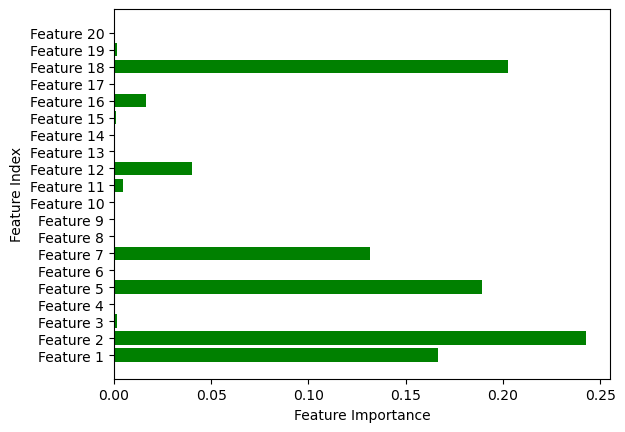

In [114]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

# Training gradient lifting regression tree model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Acquired feature importance
importances = gbr.feature_importances_

# Plot feature importance
plt.barh(range(len(importances)), importances, color='green')
plt.yticks(range(len(importances)), [f"Feature {i+1}" for i in range(len(importances))])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.show()

In [ ]:
### Optimum splitting condition

In [116]:
lower_mse=((y-y.mean()**2).mean())
lower_mse
best_split={}
for index in range(2):
    for i in range(3):
        t=X[:,index].copy()
        t.sort()

In [125]:
# Decision tree regression model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print("Decision Tree Regressor MSE:", tree_mse)

# Random forest regression model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
print("Random Forest Regressor MSE:", forest_mse)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluation of decision tree regression model
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, tree_pred)
print("Decision Tree Regressor MSE:", tree_mse)
print("Decision Tree Regressor RMSE:", tree_rmse)
print("Decision Tree Regressor MAE:", tree_mae)

# Evaluation of random forest regression models
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(y_test, forest_pred)
print("Random Forest Regressor MSE:", forest_mse)
print("Random Forest Regressor RMSE:", forest_rmse)
print("Random Forest Regressor MAE:", forest_mae)

Decision Tree Regressor MSE: 20990.178107747077
Random Forest Regressor MSE: 7036.099244321704
Decision Tree Regressor MSE: 20990.178107747077
Decision Tree Regressor RMSE: 144.87987475059148
Decision Tree Regressor MAE: 111.34806608015326
Random Forest Regressor MSE: 7036.099244321704
Random Forest Regressor RMSE: 83.88145947896773
Random Forest Regressor MAE: 66.63857249435249


In [127]:
from sklearn.metrics import r2_score

# print R²
print("R² Score for Decision Tree Regressor on test set:", r2_score(y_test, tree_pred))
print("R² Score for Random Forest Regressor on test set:", r2_score(y_test, forest_pred))

R² Score for Decision Tree Regressor on test set: 0.45773997451866155
R² Score for Random Forest Regressor on test set: 0.8182294911491521
